In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = '~/imdb_test/data'
file = 'imdb_data_2022.csv'
PATH = os.path.join(file_path, file)

df = pd.read_csv(PATH)
df.drop(['Unnamed: 0'], 1, inplace=True)
pd.set_option("display.max_rows", 50)

# Removes movies that don't have US gross.
gross_df = df[df['us_gross_millions'].notna()]

/tmp/ipykernel_239/2881386542.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Unnamed: 0'], 1, inplace=True)


In [3]:
print(gross_df.shape)
print(gross_df.columns)

(817, 12)
Index(['title', 'year_of_release', 'runtime', 'genre', 'film_rating',
       'imdb_rating', 'metascore', 'description', 'director', 'stars', 'votes',
       'us_gross_millions'],
      dtype='object')


In [38]:
# display(df)
display(gross_df)

,title,year_of_release,runtime,genre,film_rating,imdb_rating,metascore,description,director,stars,votes,us_gross_millions
9,The Dark Knight,2008,152,"Action, Crime, Drama",PG-13,9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2547406,534.86
10,The Ten Commandments,1956,220,"Adventure, Drama, Family",G,7.9,NaN,"Moses, raised as a prince of Egypt in the Phar...",Cecil B. DeMille,"Charlton Heston, Yul Brynner, Anne Baxter, Edw...",69920,93.74
11,The Shawshank Redemption,1994,142,Drama,R,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2578770,28.34
12,Once Upon a Time... In Hollywood,2019,161,"Comedy, Drama",R,7.6,83.0,A faded television actor and his stunt double ...,Quentin Tarantino,"Leonardo DiCaprio, Brad Pitt, Margot Robbie, E...",684956,142.50
13,Harry Potter and the Sorcerer's Stone,2001,152,"Adventure, Family, Fantasy",PG,7.6,65.0,An orphaned boy enrolls in a school of wizardr...,Chris Columbus,"Daniel Radcliffe, Rupert Grint, Richard Harris...",750184,317.58
...,...,...,...,...,...,...,...,...,...,...,...,...
988,Kahaani,2012,122,"Mystery, Thriller",Not Rated,8.1,NaN,A pregnant woman's search for her missing husb...,Sujoy Ghosh,"Vidya Balan, Parambrata Chattopadhyay, Indrane...",62172,1.04
989,Paan Singh Tomar,2012,135,"Action, Biography, Crime",Not Rated,8.2,NaN,"The story of Paan Singh Tomar, an Indian athle...",Tigmanshu Dhulia,"Irrfan Khan, Mahie Gill, Rajesh Abhay, Hemendr...",35868,0.04
992,Bhaag Milkha Bhaag,2013,186,"Biography, Drama, Sport",Not Rated,8.2,NaN,The truth behind the ascension of Milkha Singh...,Rakeysh Omprakash Mehra,"Farhan Akhtar, Japtej Singh, Divya Dutta, Pawa...",66710,1.63
995,Black,2005,122,Drama,Not Rated,8.1,NaN,The cathartic tale of a young woman who can't ...,Sanjay Leela Bhansali,"Amitabh Bachchan, Rani Mukerji, Shernaz Patel,...",34713,0.73


# Preliminary Data Analysis

## Correlation

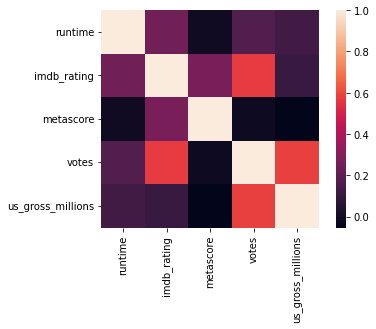

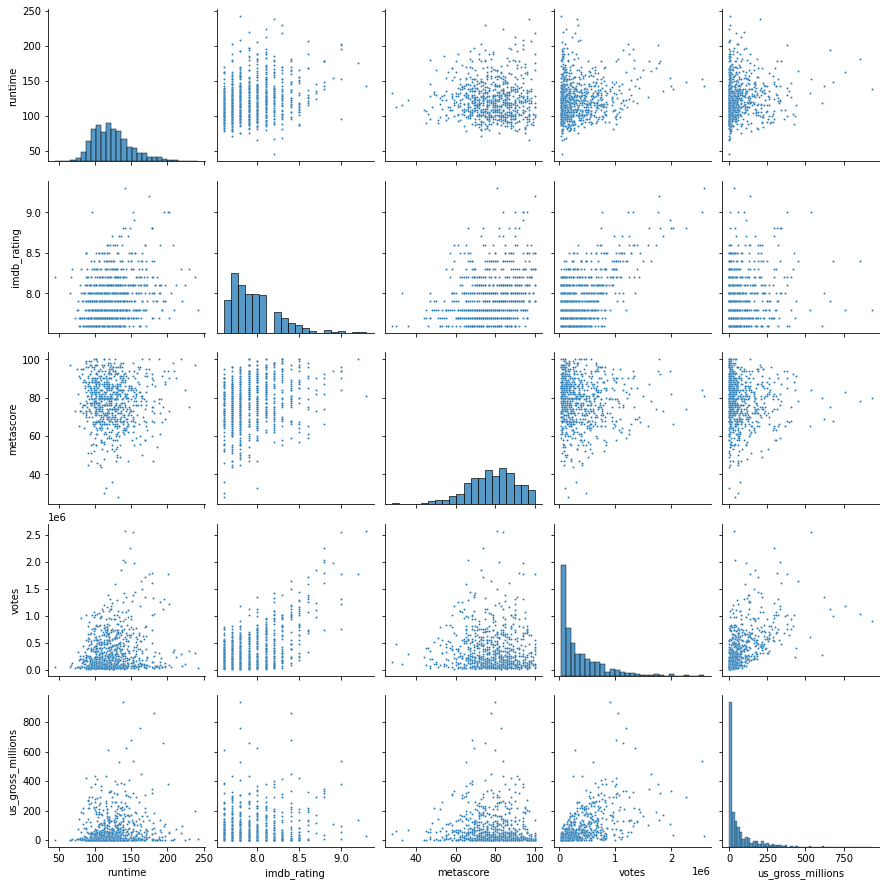

In [39]:
corr = gross_df.corr()

sns.heatmap(
    corr, square=True
)

sns.pairplot(
    gross_df, 
    diag_kind='hist',
    plot_kws={"s": 4}
)

## Looking at Directors

In [59]:
list_directors = gross_df['director'].unique()
print(f'There are {len(list_directors)} directors in this dataset')

There are 482 directors in this dataset


Top 25 Directors Based on Movies Made

In [65]:
movie_counts = gross_df['director'].value_counts()
counts_df = pd.DataFrame(movie_counts[:25]).reset_index()
counts_df.columns = ['Director(s)', 'Movies Made']

counts_df

,Director(s),Movies Made
0,Steven Spielberg,13
1,Martin Scorsese,10
2,Alfred Hitchcock,9
3,Christopher Nolan,8
4,Clint Eastwood,8
5,David Fincher,8
6,Quentin Tarantino,8
7,Woody Allen,8
8,Rob Reiner,7
9,Hayao Miyazaki,7


Top 25 directors based on US Gross

,Director(s),Average Gross (US Millions)
32,"Anthony Russo, Joe Russo",551.260000
132,Gareth Edwards,532.180000
173,J.J. Abrams,474.390000
234,Josh Cooley,434.040000
378,"Roger Allers, Rob Minkoff",422.780000
260,Lee Unkrich,415.000000
26,"Andrew Stanton, Lee Unkrich",380.840000
443,Tim Miller,363.070000
181,James Gunn,361.495000
341,"Pete Docter, Ronnie Del Carmen",356.460000


,Director(s),Total US Gross (Millions)
419,Steven Spielberg,2478.13
32,"Anthony Russo, Joe Russo",2205.04
71,Christopher Nolan,1937.45
179,James Cameron,1748.24
344,Peter Jackson,1597.31
173,J.J. Abrams,1423.17
376,Robert Zemeckis,1049.44
51,Brad Bird,893.18
364,Ridley Scott,766.71
350,Quentin Tarantino,727.04


<function matplotlib.pyplot.show(close=None, block=None)>

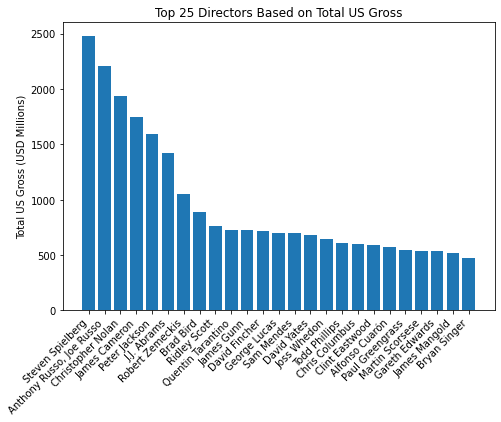

In [83]:

def top_x(
    data = '',
    group = '',
    criteria = '',
    cols = [],
    x = 10
    ):
    '''
    Returns a top x dataframe based on group and a criteria.
    Averages the group based on the criteria. 
    '''

    df = data.groupby(group, as_index=False)[criteria].mean()
    df.columns = cols
    df.sort_values(
    by = cols[1],
    axis = 'index',
    ascending = False,
    inplace=True
    )

    return df.iloc[:x]

    
average_gross = top_x(
    data = gross_df,
    group = 'director',
    criteria = 'us_gross_millions',
    cols = ['Director(s)', 'Average Gross (US Millions)'],
    x = 25
)

display(average_gross[:25])


total_gross = gross_df.groupby('director', as_index=False)['us_gross_millions'].sum()
total_gross.columns = ['Director(s)', 'Total US Gross (Millions)']
total_gross.sort_values(
    by=total_gross.columns[1],
    axis='index',
    ascending=False,
    inplace=True
)
display(total_gross[:25])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(total_gross[:25][total_gross.columns[0]], total_gross[:25][total_gross.columns[1]])
plt.ylabel('Total US Gross (USD Millions)')
plt.title('Top 25 Directors Based on Total US Gross')
plt.xticks(rotation=45, ha="right")
plt.show

In [57]:
top_x(
    data = gross_df,
    group = 'director',
    criteria = 'imdb_rating',
    cols = ['Director(s)', 'Average IMDB Rating'],
    x= 25
)

,Director(s),Average IMDB Rating
126,Frank Darabont,8.9500
170,Irvin Kershner,8.7000
256,"Lana Wachowski, Lilly Wachowski",8.7000
121,"Fernando Meirelles, Kátia Lund",8.6000
377,Roberto Benigni,8.6000
308,Milos Forman,8.5500
378,"Roger Allers, Rob Minkoff",8.5000
326,"Olivier Nakache, Éric Toledano",8.5000
294,Michael Curtiz,8.5000
71,Christopher Nolan,8.4625


In [58]:
top_x(
    data = gross_df,
    group = 'director',
    criteria = 'metascore',
    cols = ['Director(s)', 'Average Metascore'],
    x= 25
)

,Director(s),Average Metascore
294,Michael Curtiz,100.000000
169,Ingmar Bergman,100.000000
327,Orson Welles,99.500000
65,Charles Laughton,99.000000
410,"Stanley Donen, Gene Kelly",99.000000
154,Guillermo del Toro,98.000000
231,Joseph L. Mankiewicz,98.000000
130,Fritz Lang,98.000000
64,Charles Chaplin,97.500000
238,Jules Dassin,97.000000


## Checking for Collinearity of the Numerical Values Based on Variance Inflation Factor

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

num_df = gross_df._get_numeric_data()

# Check for missingness in the columns.
for cols in num_df.columns:
    print(f'{cols}_missing: {num_df[cols].isna().sum()}')

num_df_no_na = num_df[num_df['metascore'].notna()]

num_df_no_na

runtime_missing: 0
imdb_rating_missing: 0
metascore_missing: 83
votes_missing: 0
us_gross_millions_missing: 0


,runtime,imdb_rating,metascore,votes,us_gross_millions
9,152,9.0,84.0,2547406,534.86
11,142,9.3,81.0,2578770,28.34
12,161,7.6,83.0,684956,142.50
13,152,7.6,65.0,750184,317.58
14,102,7.6,64.0,563946,15.07
...,...,...,...,...,...
963,85,7.7,64.0,57463,27.28
965,140,8.0,64.0,39472,1.11
968,192,7.8,67.0,52224,2.92
981,122,7.7,85.0,31934,0.74


In [6]:
vif_df = pd.DataFrame()
vif_df['Feature'] = num_df_no_na.columns[:-1]
vif_df['VIF'] = [
    variance_inflation_factor(
        num_df_no_na[num_df_no_na.columns[:-1]].values, i
        ) 
        for i in range(len(num_df_no_na.columns[:-1]))
]

vif_df

,Feature,VIF
0,runtime,24.732568
1,imdb_rating,78.387259
2,metascore,47.314772
3,votes,2.148999


We can see that runtime, imdb_rating and metascore are linearly dependent to each other through the variance inflation factor. 